<a href="https://colab.research.google.com/github/FDS116/DITAs/blob/main/DITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data reading
import pandas as pd
from pandas import ExcelWriter
#Graphics
import matplotlib.pyplot as plt
#Regression
from sklearn.linear_model import LinearRegression
#Data division
from sklearn.model_selection import train_test_split
#Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

# S° (g)

In [ ]:
S=pd.read_csv("/content/drive/MyDrive/phyton/DIDAS.csv")
S

,Name,Formula,S°,absS°,Hf°,Sf°,Gf°,group,CO-(O)(CO),CO-(CD)(O),...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
0,Benzoic acid,C7H6O2,85.050,355.849200,295.7,281.086800,211.893971,acid,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2-Methylbenzoic acid,C8H8O2,92.483,386.948872,320.6,386.298128,205.425213,acid,0,0,...,0,0,0,2,0,0,0,1,0,0
2,3-Methylbenzoic acid,C8H8O2,95.463,399.417192,327.9,373.829808,216.442643,acid,0,0,...,0,0,0,3,0,0,0,0,1,0
3,4-Methylbenzoic acid,C8H8O2,95.643,400.170312,330.4,373.076688,219.167185,acid,0,0,...,0,0,0,4,0,0,0,0,0,1
4,2-Propenoic acid,C3H4O2,72.435,303.068040,330.7,180.336960,276.932535,acid,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"N,N′ -(1,4-phenylene)bis(phthalimide)",C22H12N2O4,154.589,646.800376,299.6,864.491624,41.851822,imide,0,0,...,2,2,2,4,0,0,0,0,0,1
73,"N,N′ -(1,3-phenylene)bis(phthalimide)",C22H12N2O4,155.554,650.837936,295.0,860.454064,38.455621,imide,0,0,...,2,2,2,3,0,0,0,0,1,0
74,o-DIDA,C24H12N2O8,NaN,NaN,NaN,NaN,NaN,acid,0,0,...,2,2,2,2,0,0,0,1,0,0
75,"3,4-DITA",C25H12N2O10,NaN,NaN,NaN,NaN,NaN,acid,0,0,...,2,2,2,3,4,0,0,0,1,1


In [ ]:
S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            77 non-null     object 
 1   Formula         77 non-null     object 
 2   S°              74 non-null     float64
 3   absS°           74 non-null     float64
 4   Hf°             74 non-null     float64
 5   Sf°             74 non-null     float64
 6   Gf°             74 non-null     float64
 7   group           77 non-null     object 
 8   CO-(O)(CO)      77 non-null     int64  
 9   CO-(CD)(O)      77 non-null     int64  
 10  CO-(C)(O)       77 non-null     int64  
 11  CO-(H)(O)       77 non-null     int64  
 12  CO-(O)(CB)      77 non-null     int64  
 13  O-(H)(CO)       77 non-null     int64  
 14  O-(C)(CB)       77 non-null     int64  
 15  CD-(H)(CO)      77 non-null     int64  
 16  CB-(CO)(CB)2    77 non-null     int64  
 17  CB-(O)(CB)2     77 non-null     int64

In [ ]:
#Variables
X=S.iloc[:-3,8:]
y=S.iloc[:-3,3]

In [ ]:
#Compunds
nDIDA=S.iloc[74:, 8:]
nDIDA

,CO-(O)(CO),CO-(CD)(O),CO-(C)(O),CO-(H)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
74,0,0,0,0,2,2,0,0,6,0,...,2,2,2,2,0,0,0,1,0,0
75,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,4,0,0,0,1,1
76,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,5,0,0,0,2,0


In [ ]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=652)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)
print(round(linear.score(X_train,y_train),4))
print(round(linear.score(X_test,y_test),4))

0.9979
0.9964


In [ ]:
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)
y_pred_didas=linear.predict(nDIDA)

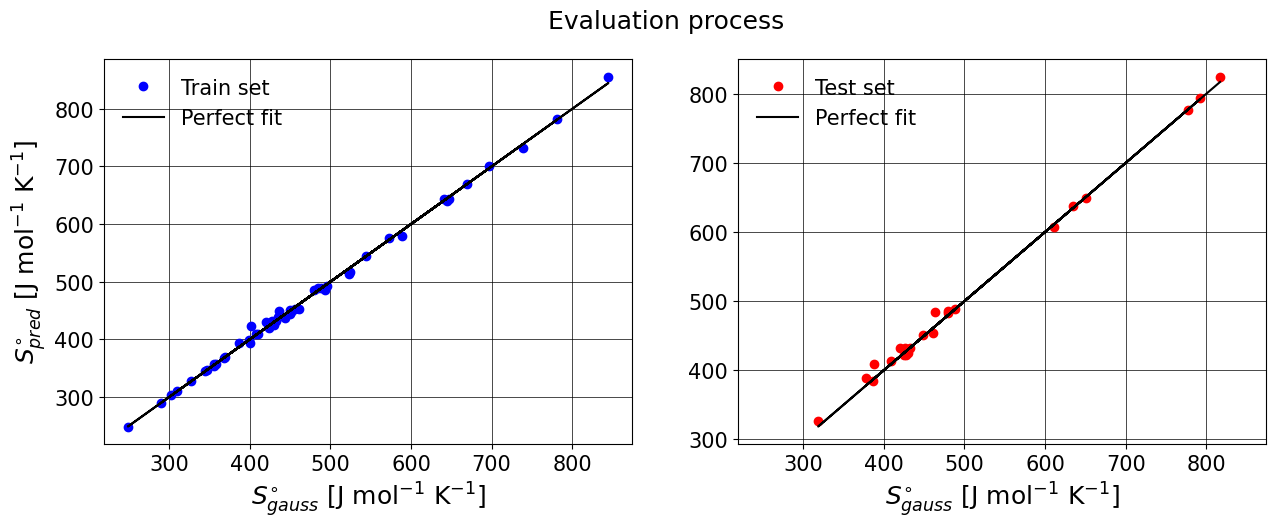

In [ ]:
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train, "bo",label="Train set")
ax0.plot(y_train, y_train, "k-",label="Perfect fit")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("$S_{pred}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]", size=18)
ax0.set_xlabel("$S_{gauss}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test, "ro", label="Test set")
ax1.plot(y_test, y_test, "k-",label="Perfect fit")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("$S_{gauss}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [ ]:
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train),4)))
print("The MAE of the training set is: {}".format(round(mean_absolute_error(y_train,y_pred_train),4)))
print("The RMSE of the training set is: {}".format(round(root_mean_squared_error(y_train,y_pred_train),4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test),4)))
print("The MAE of the testing set is: {}".format(round(mean_absolute_error(y_test,y_pred_test),4)))
print("The RMSE of the testing set is: {}".format(round(root_mean_squared_error(y_test,y_pred_test),4)))

The R² of the training set is: 0.9979
The MAE of the training set is: 3.9272
The RMSE of the training set is: 5.7921
The R² of the testing set is: 0.9964
The MAE of the testing set is: 6.1227
The RMSE of the testing set is: 8.247


In [ ]:
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_didas[0]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_didas[2]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_didas[1]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 777.3 J mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 848.0 J mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 839.8 J mol⁻¹ K⁻¹


In [ ]:
Benson=pd.DataFrame(data=list(zip(X, (linear.coef_).round(2))), columns=["Grupo funcional", "Valor"])
print(Benson)
with pd.ExcelWriter("Benson.xlsx") as writer:
  Benson.to_excel(writer, sheet_name="Benson", index=False)


   Grupo funcional  Valor
0       CO-(O)(CO)   9.79
1       CO-(CD)(O)  -0.17
2        CO-(C)(O)  13.61
3        CO-(H)(O) -32.67
4       CO-(O)(CB)  18.43
5        O-(H)(CO)   8.98
6        O-(C)(CB)  18.77
7       CD-(H)(CO)  21.74
8     CB-(CO)(CB)2  41.55
9      CB-(O)(CB)2  18.77
10      C-(CO)(C)3  12.26
11  C-(H)2(CO)(C)   37.04
12       C-(H)3(O)  18.77
13       C-(H)3(C)  -5.39
14      C-(H)3(CB)   3.46
15      C-(H)2(C)2  31.12
16         CD-(H)2  -0.17
17     CB-(H)(CB)2   2.38
18     CB-(C)(CB)2  37.91
19   C-(H)2(C)(CB)  34.45
20          C-(C)4  -0.00
21        CH3(qua)  24.52
22        CB-(CB)3  18.22
23       CO-(C)(N)  12.21
24      N-(H)(CO)2 -23.65
25       C-(H)3(N)  -3.66
26      N-(CO)2(C)  21.61
27      CO-(CD)(N)  21.91
28      CO-(N)(CB)  23.12
29   CB-(NO2)(CB)2  58.75
30    C-(H)2(N)(C)  25.27
31     CB-(N)(CB)2  30.65
32     N-(CO)2(CB)  30.65
33             rsc -20.22
34       radical 1   2.78
35       radical 2   0.32
36       radical 3  -3.47
37       rad

# -$\Delta_f$S° (g)

In [ ]:
#Variables
X=S.iloc[:-3,8:]
y=S.iloc[:-3,5]

In [ ]:
#Compunds
nDIDA=S.iloc[74:, 8:]
nDIDA

,CO-(O)(CO),CO-(CD)(O),CO-(C)(O),CO-(H)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
74,0,0,0,0,2,2,0,0,6,0,...,2,2,2,2,0,0,0,1,0,0
75,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,4,0,0,0,1,1
76,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,5,0,0,0,2,0


In [ ]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=652)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)
print(round(linear.score(X_train,y_train),4))
print(round(linear.score(X_test,y_test),4))

0.9998
0.9996


In [ ]:
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)
y_pred_didas=linear.predict(nDIDA)

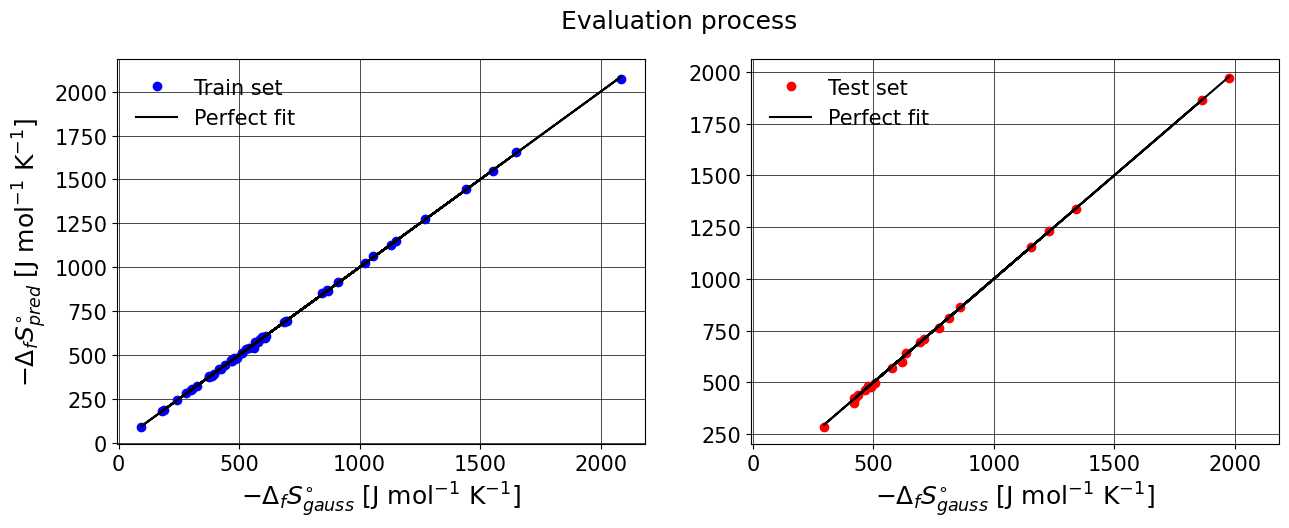

In [ ]:
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train, "bo",label="Train set")
ax0.plot(y_train, y_train, "k-",label="Perfect fit")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("$-\Delta_fS_{pred}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]", size=18)
ax0.set_xlabel("$-\Delta_fS_{gauss}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test, "ro", label="Test set")
ax1.plot(y_test, y_test, "k-",label="Perfect fit")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("$-\Delta_fS_{gauss}^{\circ}$ [J mol$^{-1}$ K$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [ ]:
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train),4)))
print("The MAE of the training set is: {}".format(round(mean_absolute_error(y_train,y_pred_train),4)))
print("The RMSE of the training set is: {}".format(round(root_mean_squared_error(y_train,y_pred_train),4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test),4)))
print("The MAE of the testing set is: {}".format(round(mean_absolute_error(y_test,y_pred_test),4)))
print("The RMSE of the testing set is: {}".format(round(root_mean_squared_error(y_test,y_pred_test),4)))

The R² of the training set is: 0.9998
The MAE of the training set is: 3.9272
The RMSE of the training set is: 5.7921
The R² of the testing set is: 0.9996
The MAE of the testing set is: 6.3722
The RMSE of the testing set is: 8.481


In [ ]:
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_didas[0]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_didas[2]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_didas[1]).round(1)), "J mol\u207b\u00b9 K\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 1155.6 J mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1295.6 J mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1303.8 J mol⁻¹ K⁻¹


In [ ]:
Benson=pd.DataFrame(data=list(zip(X, (linear.coef_).round(2))), columns=["Grupo funcional", "Valor"])
print(Benson)
with pd.ExcelWriter("Benson.xlsx") as writer:
  Benson.to_excel(writer, sheet_name="Benson", index=False)

   Grupo funcional   Valor
0       CO-(O)(CO)   28.16
1       CO-(CD)(O)   -6.50
2        CO-(C)(O)   24.34
3        CO-(H)(O)  -77.16
4       CO-(O)(CB)   47.22
5        O-(H)(CO)   16.06
6        O-(C)(CB)   60.84
7       CD-(H)(CO)   23.82
8     CB-(CO)(CB)2   78.55
9      CB-(O)(CB)2   60.84
10      C-(CO)(C)3   74.12
11  C-(H)2(CO)(C)    99.27
12       C-(H)3(O)   60.84
13       C-(H)3(C)   -6.09
14      C-(H)3(CB)   -7.28
15      C-(H)2(C)2  105.19
16         CD-(H)2   -6.50
17     CB-(H)(CB)2   -2.38
18     CB-(C)(CB)2  102.23
19   C-(H)2(C)(CB)  109.51
20          C-(C)4   -0.00
21        CH3(qua)  148.24
22        CB-(CB)3   58.55
23       CO-(C)(N)   14.54
24      N-(H)(CO)2  -78.45
25       C-(H)3(N)  -34.20
26      N-(CO)2(C)   50.46
27      CO-(CD)(N)   30.32
28      CO-(N)(CB)   31.33
29   CB-(NO2)(CB)2  176.76
30    C-(H)2(N)(C)   84.66
31     CB-(N)(CB)2   66.09
32     N-(CO)2(CB)   66.09
33             rsc   20.22
34       radical 1   -2.78
35       radical 2   -0.32
3

# -$\Delta_f$G° (g)

In [ ]:
#Variables
X=S.iloc[:-3,8:]
y=S.iloc[:-3,6]

In [ ]:
#Compunds
nDIDA=S.iloc[74:, 8:]
nDIDA

,CO-(O)(CO),CO-(CD)(O),CO-(C)(O),CO-(H)(O),CO-(O)(CB),O-(H)(CO),O-(C)(CB),CD-(H)(CO),CB-(CO)(CB)2,CB-(O)(CB)2,...,CB-(N)(CB)2,N-(CO)2(CB),rsc,radical 1,radical 2,radical 3,radical 4,Correction o,Correction m,Correction p
74,0,0,0,0,2,2,0,0,6,0,...,2,2,2,2,0,0,0,1,0,0
75,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,4,0,0,0,1,1
76,0,0,0,0,3,3,0,0,7,0,...,2,2,2,3,5,0,0,0,2,0


In [ ]:
#Data split
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, random_state=342)

In [ ]:
linear=LinearRegression()
linear.fit(X_train,y_train)
print(round(linear.score(X_train,y_train),4))
print(round(linear.score(X_test,y_test),4))

0.9994
0.9986


In [ ]:
y_pred_train=linear.predict(X_train)
y_pred_test=linear.predict(X_test)
y_pred_didas=linear.predict(nDIDA)

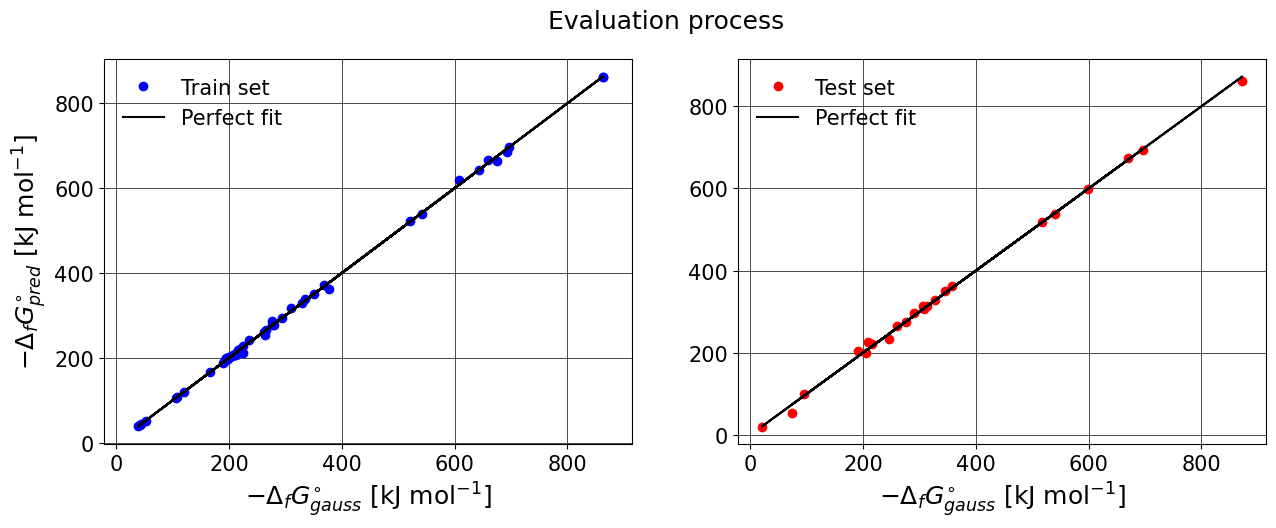

In [ ]:
f, (ax0, ax1)=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(15,5))
plt.suptitle("Evaluation process", size=18)
ax0.plot(y_train, y_pred_train, "bo",label="Train set")
ax0.plot(y_train, y_train, "k-",label="Perfect fit")
ax0.legend(loc="best", frameon=False, prop={"size":15})
ax0.set_ylabel("$-\Delta_fG_{pred}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.set_xlabel("$-\Delta_fG_{gauss}^{\circ}$ [kJ mol$^{-1}$]", size=18)
ax0.tick_params(labelsize=15)
ax0.grid(linestyle='-', linewidth=0.5, color="k")
ax1.plot(y_test, y_pred_test, "ro", label="Test set")
ax1.plot(y_test, y_test, "k-",label="Perfect fit")
ax1.legend(loc="best", frameon=False, prop={"size":15})
ax1.set_xlabel("$-\Delta_fG_{gauss}^{\circ}$ [kJ mol$^{-1}$]",size=18)
ax1.tick_params(labelsize=15)
ax1.grid(linestyle='-', linewidth=0.5, color="k")
plt.show()

In [ ]:
print("The R\u00b2 of the training set is: {}".format(round(r2_score(y_train,y_pred_train),4)))
print("The MAE of the training set is: {}".format(round(mean_absolute_error(y_train,y_pred_train),4)))
print("The RMSE of the training set is: {}".format(round(root_mean_squared_error(y_train,y_pred_train),4)))
print("The R\u00b2 of the testing set is: {}".format(round(r2_score(y_test,y_pred_test),4)))
print("The MAE of the testing set is: {}".format(round(mean_absolute_error(y_test,y_pred_test),4)))
print("The RMSE of the testing set is: {}".format(round(root_mean_squared_error(y_test,y_pred_test),4)))

The R² of the training set is: 0.9994
The MAE of the training set is: 2.9398
The RMSE of the training set is: 4.9202
The R² of the testing set is: 0.9986
The MAE of the testing set is: 5.7992
The RMSE of the testing set is: 7.8588


In [ ]:
print("the enthalpy of formation in gas phase of o-DIDA is {}".format((y_pred_didas[0]).round(1)), "kJ mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,5-DITA is {}".format((y_pred_didas[2]).round(1)), "kJ mol\u207b\u00b9 K\u207b\u00b9")
print("the enthalpy of formation in gas phase of 3,4-DITA is {}".format((y_pred_didas[1]).round(1)), "kJ mol\u207b\u00b9 K\u207b\u00b9")

the enthalpy of formation in gas phase of o-DIDA is 675.6 kJ mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,5-DITA is 1023.8 kJ mol⁻¹ K⁻¹
the enthalpy of formation in gas phase of 3,4-DITA is 1017.9 kJ mol⁻¹ K⁻¹


In [ ]:
Benson=pd.DataFrame(data=list(zip(X, (linear.coef_).round(2))), columns=["Grupo funcional", "Valor"])
print(Benson)
with pd.ExcelWriter("Benson.xlsx") as writer:
  Benson.to_excel(writer, sheet_name="Benson", index=False)

   Grupo funcional   Valor
0       CO-(O)(CO)   79.72
1       CO-(CD)(O)   20.23
2        CO-(C)(O)   79.44
3        CO-(H)(O)  181.71
4       CO-(O)(CB)  -23.22
5        O-(H)(CO)  337.89
6        O-(C)(CB)   37.25
7       CD-(H)(CO)   67.02
8     CB-(CO)(CB)2   21.67
9      CB-(O)(CB)2   37.25
10      C-(CO)(C)3  -55.26
11  C-(H)2(CO)(C)     9.41
12       C-(H)3(O)   37.25
13       C-(H)3(C)  114.10
14      C-(H)3(CB)   48.20
15      C-(H)2(C)2  -10.78
16         CD-(H)2   20.23
17     CB-(H)(CB)2    8.79
18     CB-(C)(CB)2  -31.24
19   C-(H)2(C)(CB)  -79.44
20          C-(C)4  -25.81
21        CH3(qua) -110.51
22        CB-(CB)3  -40.84
23       CO-(C)(N)  153.75
24      N-(H)(CO)2  124.97
25       C-(H)3(N)   75.91
26      N-(CO)2(C)   36.18
27      CO-(CD)(N)   46.79
28      CO-(N)(CB)   44.89
29   CB-(NO2)(CB)2  -57.45
30    C-(H)2(N)(C)  -39.73
31     CB-(N)(CB)2  -38.44
32     N-(CO)2(CB)  -38.44
33             rsc   -4.19
34       radical 1    4.35
35       radical 2    3.34
3